# Pandas More Utility Functions

A demonstration of advanced `pandas` syntax to accompany Lecture 4.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

## Dataset: California baby names

In today's lecture, we'll work with the `babynames` dataset, which contains information about the names of infants born in California.

The cell below pulls census data from a government website and then loads it into a usable form. The code shown here is outside of the scope of Data 100, but you're encouraged to dig into it if you are interested!

In [10]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


### Exercises
We want to obtain the first three baby names with `count > 250`.

1.Code this using head()

2.Code this using loc

3.Code this using iloc

4.Code this using []


In [11]:
# Answer Here
babynames[babynames["Count"] > 250]
babynames.head(3)


,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220


In [12]:
# Answer Here
babynames.loc[babynames["Count"] > 250, :].head(3)

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


In [13]:
# Answer Here
babynames.iloc[[0, 1, 2], :]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220


In [ ]:
# Answer Here



,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


### `.isin` for Selection based on a list, array, or `Series`

In [14]:
# Note: The parentheses surrounding the code make it possible to break the code into multiple lines for readability
babynames[(babynames["Name"] == "Bella") |
              (babynames["Name"] == "Alex") |
              (babynames["Name"] == "Narges") |
              (babynames["Name"] == "Lisa")]


,State,Sex,Year,Name,Count
6289,CA,F,1923,Bella,5
7512,CA,F,1925,Bella,8
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5
...,...,...,...,...,...
399773,CA,M,2019,Alex,438
402648,CA,M,2020,Alex,379
405452,CA,M,2021,Alex,334
408335,CA,M,2022,Alex,345


In [16]:
# A more concise method to achieve the above: .isin
#Answer Here
babynames[babynames["Name"].isin(["Bella", "Alex", "Narges", "Lisa"])].head()




,State,Sex,Year,Name,Count
6289,CA,F,1923,Bella,5
7512,CA,F,1925,Bella,8
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5


### `.str` Functions for Defining a Condition

In [17]:
# What if we only want names that start with "J"?
#Answer Here
babynames[babynames["Name"].str.startswith("J")].head()



,State,Sex,Year,Name,Count
16,CA,F,1910,Josephine,66
44,CA,F,1910,Jean,35
46,CA,F,1910,Jessie,32
59,CA,F,1910,Julia,28
66,CA,F,1910,Juanita,25


# Custom Sort

In [21]:
# Sort a Series Containing Names
#Answer Here
print(babynames["Name"].sort_values())

387660      Aadan
369654      Aadan
372774      Aadan
401876    Aadarsh
388799      Aaden
           ...   
232190      Zyrah
220708      Zyrah
217445      Zyrah
197542      Zyrah
408216      Zyrus
Name: Name, Length: 413894, dtype: object


In [22]:
# Sort a DataFrame – there are lots of Michaels in California
#Answer Here
babynames[babynames["Name"] == "Michael"].sort_values(by="Count", ascending=False)

,State,Sex,Year,Name,Count
271693,CA,M,1957,Michael,8263
270669,CA,M,1956,Michael,8257
321036,CA,M,1990,Michael,8247
285500,CA,M,1969,Michael,8244
286795,CA,M,1970,Michael,8197
...,...,...,...,...,...
175078,CA,F,2006,Michael,9
18484,CA,F,1941,Michael,8
179866,CA,F,2007,Michael,7
16200,CA,F,1938,Michael,7


### Approach 1: Create a temporary column

In [29]:
# Create a Series of the length of each name
name_series = babynames["Name"].str.len()

# Add the Series as a new column to the DataFrame
babynames["Name Length"] = name_series
babynames.head()

# Sort the DataFrame by the new column
babynames.sort_values(by="Name Length", ascending=False)


,State,Sex,Year,Name,Count,Name Length
341130,CA,M,1997,Ryanchristopher,5,15
348093,CA,M,2000,Franciscojavier,6,15
331124,CA,M,1993,Ryanchristopher,5,15
337819,CA,M,1996,Franciscojavier,8,15
317627,CA,M,1988,Franciscojavier,10,15
...,...,...,...,...,...,...
114679,CA,F,1990,An,10,2
352991,CA,M,2002,Jc,7,2
244981,CA,M,1916,Al,8,2
118952,CA,F,1991,Vi,8,2


In [30]:
# drop new column
babynames.drop(columns="Name Length")

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
413889,CA,M,2023,Ziah,5
413890,CA,M,2023,Ziaire,5
413891,CA,M,2023,Zidane,5
413892,CA,M,2023,Zyan,5


### Approach 2: Sorting using the `key` argument

---



In [31]:
# Answer Here
babynames.sort_values(by="Name", key=lambda x: x.str.len(), ascending=False)

,State,Sex,Year,Name,Count,Name Length
341130,CA,M,1997,Ryanchristopher,5,15
348093,CA,M,2000,Franciscojavier,6,15
331124,CA,M,1993,Ryanchristopher,5,15
337819,CA,M,1996,Franciscojavier,8,15
317627,CA,M,1988,Franciscojavier,10,15
...,...,...,...,...,...,...
114679,CA,F,1990,An,10,2
352991,CA,M,2002,Jc,7,2
244981,CA,M,1916,Al,8,2
118952,CA,F,1991,Vi,8,2


### Approach 3: Sorting Using the `map` Function

We can also use the Python map function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [32]:

# Define a function to count occurrences of 'dr' and 'ea'
def count_drea(name):
    return name.count('dr') + name.count('ea')


# Apply the function to each name in the "Name" column and add as a new column
babynames["dr_ea_count"] = babynames["Name"].map(count_drea)

# Sort the DataFrame by the new column in descending order
babynames.sort_values(by="dr_ea_count", ascending=False)

# Display the top rows
babynames.head()


,State,Sex,Year,Name,Count,Name Length,dr_ea_count
0,CA,F,1910,Mary,295,4,0
1,CA,F,1910,Helen,239,5,0
2,CA,F,1910,Dorothy,220,7,0
3,CA,F,1910,Margaret,163,8,0
4,CA,F,1910,Frances,134,7,0


In [33]:
# Drop the `dr_ea_count` column
babynames.drop(columns="dr_ea_count")


,State,Sex,Year,Name,Count,Name Length
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7
...,...,...,...,...,...,...
413889,CA,M,2023,Ziah,5,4
413890,CA,M,2023,Ziaire,5,6
413891,CA,M,2023,Zidane,5,6
413892,CA,M,2023,Zyan,5,4


## Grouping

Group rows that share a common feature, then aggregate data across the group.

In this example, we count the total number of babies born in each year (considering only a small subset of the data, for simplicity).

<img src="images/groupby.png" width="800"/>

In [37]:
# DataFrame with baby gril names only
babynames_f = babynames[babynames["Sex"] == "F"]


# Answer Here
#Groupby similar features like year and apply aggregate
babynames_f.groupby("Year")["Count"].sum()

# Answer Here
# Sort by Count
babynames_f.groupby("Year")["Count"].sum().sort_values(ascending=False)
# Sort by Count in descending order
# Answer Here
babynames_f.groupby("Year")["Count"].sum().sort_values(ascending=False)


,Count
Year,
1990,262422
1991,261497
1992,256788
1993,249572
1989,243985
...,...
1914,13815
1913,11860
1912,9804


In [39]:
# print first 10 entries
babynames_f.head(10)

,State,Sex,Year,Name,Count,Name Length,dr_ea_count
0,CA,F,1910,Mary,295,4,0
1,CA,F,1910,Helen,239,5,0
2,CA,F,1910,Dorothy,220,7,0
3,CA,F,1910,Margaret,163,8,0
4,CA,F,1910,Frances,134,7,0
5,CA,F,1910,Ruth,128,4,0
6,CA,F,1910,Evelyn,126,6,0
7,CA,F,1910,Alice,118,5,0
8,CA,F,1910,Virginia,101,8,0
9,CA,F,1910,Elizabeth,93,9,0


In [40]:
# the total baby count in each year
# Answer Here
babynames_f.groupby("Year")["Count"].sum()


,Count
Year,
1910,5950
1911,6602
1912,9804
1913,11860
1914,13815
...,...
2019,184384
2020,173966
2021,174190


There are many different aggregation functions we can use, all of which are useful in different applications.

In [42]:
# What is the earliest year in which each name appeared?
# Answer Here
babynames.groupby("Name")["Year"].min().head(1)

,Year
Name,
Aadan,2008


In [44]:
# What is the largest single-year count of each name?
# Answer Here
babynames.groupby("Name")["Year"].max().head(1)

,Year
Name,
Aadan,2014


In [49]:
#Can you find the most popular baby name in the state of California (CA) for each year? use idxmax function.
#Provide a list of years along with the corresponding most popular names."
# Answer Here
result = babynames[babynames["State"] == "CA"].groupby("Year")["Count"].idxmax()
#Answer Here
result


,Count
Year,
1910,0
1911,233
1912,484
1913,243717
1914,1120
...,...
2019,399666
2020,402534
2021,405331


## Case Study: Name "Popularity"

In this exercise, let's find the name with sex "F" that has dropped most in popularity since its peak usage. We'll start by filtering `babynames` to only include names corresponding to sex "F".

In [ ]:
#Answer Here
female_data = babynames[babynames["Sex"] == "F"]
female_data

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
243185,CA,F,2023,Zeppelin,5
243186,CA,F,2023,Zhamira,5
243187,CA,F,2023,Zina,5
243188,CA,F,2023,Zooey,5


In [ ]:
# We sort the data by year
female_data.sort_values(by="Year", ascending=True)

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
148,CA,F,1910,Merle,9
149,CA,F,1910,Rosalie,9
150,CA,F,1910,Rosie,9
151,CA,F,1910,Teresa,9
...,...,...,...,...,...
240783,CA,F,2023,Zayna,22
240784,CA,F,2023,Aashvi,21
240785,CA,F,2023,Aida,21
240759,CA,F,2023,Eimy,22


To build our intuition on how to answer our research question, let's visualize the prevalence of the name "Jennifer" over time.

In [ ]:
# We'll talk about how to generate plots in a later lecture
fig = px.line(female_data[female_data["Name"] == "Jennifer"],
              x = "Year", y = "Count")
fig.update_layout(font_size = 18,
                  autosize=False,
                 width=1000,
                  height=400)

We'll need a mathematical definition for the change in popularity of a name.

Define the metric "ratio to peak" (RTP). We'll calculate this as the count of the name in 2022 (the most recent year for which we have data) divided by the largest count of this name in *any* year.

A demo calculation for Jennifer:

In [ ]:
# Find the highest Jennifer 'count'

jen_count_max = max(female_data[female_data["Name"] == "Jennifer"]["Count"])
jen_count_max




6065

In [ ]:
# Remember that we sorted f_babynames by year.
# This means that grabbing the final entry gives us the most recent count of Jennifers: 114
# In 2022, the most recent year for which we have data, 114 Jennifers were born

jen_curr_count = female_data[female_data["Name"] == "Jennifer"]["Count"].iloc[-1]
jen_curr_count

88

In [ ]:
# Compute the RTP
rtp = jen_curr_count/jen_count_max
rtp

0.014509480626545754

We can also write a function that produces the `ratio_to_peak`for a given `Series`. This will allow us to use `.groupby` to speed up our computation for all names in the dataset.

In [ ]:
# define the function for RTP
"""
Compute the RTP for a Series containing the counts per year for a single name
"""
def rtp(series):
  return series.iloc[-1] / jen_count_max

rtp_table = female_data.groupby("Name")[["Year","Count"]].agg(rtp)
rtp_table.head(10)

,Year,Count
Name,,
Aadhini,0.333388,0.000989
Aadhira,0.333388,0.000824
Aadhya,0.333553,0.006265
Aadya,0.333553,0.003627
Aahana,0.333388,0.001154
Aahna,0.332069,0.001154
Aaira,0.333553,0.001319
Aairah,0.332564,0.000824
Aalani,0.333553,0.000824


In [ ]:
# Construct a Series containing our Jennifer count data
count_jenn = female_data[female_data["Name"] == "Jennifer"]["Count"]
print(count_jenn)

# Then, find the RTP using the function define above

rtp(count_jenn)

13610       5
16325       5
16993       6
17533      13
18210      24
         ... 
225169    145
228809    141
232585     91
236162    115
239956     88
Name: Count, Length: 87, dtype: int64


0.014509480626545754

Now, let's use `.groupby` to compute the RTPs for *all* names in the dataset.

You may see a warning message when running the cell below. As discussed in lecture, `pandas` can't apply an aggregation function to non-numeric data (it doens't make sense to divide "CA" by a number). By default, `.groupby` will drop any columns that cannot be aggregated.

In [ ]:
# Results in a TypeError
rtp_table = female_data.groupby("Name").agg(rtp)
rtp_table

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# Find the RTP fro all names at once using groupby as describe in lec slides
rtp_table = female_data.groupby("Name")[["Year","Count"]].agg(rtp)
rtp_table.head(5)


,Year,Count
Name,,
Aadhini,0.333388,0.000989
Aadhira,0.333388,0.000824
Aadhya,0.333553,0.006265
Aadya,0.333553,0.003627
Aahana,0.333388,0.001154


To avoid the warning message above, we explicitly extract only the columns relevant to our analysis before using `.agg`.

In [ ]:
# Recompute the RTPs, but only performing the calculation on the "Count" column
rtp_table = female_data.groupby("Name")[["Count"]].agg(rtp)
rtp_table.head(5)

,Count
Name,
Aadhini,0.000989
Aadhira,0.000824
Aadhya,0.006265
Aadya,0.003627
Aahana,0.001154


In [ ]:
# Rename "Count" to "Count RTP" for clarity
rtp_table = rtp_table.rename(columns= {"Count": "Count RTP"})
rtp_table

,Count RTP
Name,
Aadhini,0.000989
Aadhira,0.000824
Aadhya,0.006265
Aadya,0.003627
Aahana,0.001154
...,...
Zyanya,0.001979
Zyla,0.005771
Zylah,0.003298


In [ ]:
# What name has fallen the most in popularity?
rtp_table.sort_values(by="Count RTP", ascending=False).tail(1)



,Count RTP
Name,
Zyrah,0.000824


We can visualize the decrease in the popularity of the name "?:"

In [ ]:
import plotly.express as px

def plot_name(rtp_table):
    fig = px.line(female_data[female_data["Name"].isin(rtp_table)],
                  x="Year", y="Count", color="Name",
                  title=f"Popularity for: {', '.join(rtp_table)}")
    fig.update_layout(font_size=18,
                      autosize=False,
                      width=1000,
                      height=400)
    return fig

# Pass a list of names into plot_name
plot_name(['Zyrah'])  # Example names


In [ ]:
# def plot_name(rtp_tableNam):
#     fig = px.line(female_data[female_data["Name"].isin(rtp_table)],
#                   x = "Year", y = "Count", color="Name",
#                   title=f"Popularity for: {rtp_table}")
#     fig.update_layout(font_size = 18,
#                   autosize=False,
#                   width=1000,
#                   height=400)
#     return fig
# # pass the name into plot_name
# plot_name("Female Over the Time")

In [ ]:
# Find the 10 names that have decreased the most in popularity
# Answer Here
top_10_dec= rtp_table.sort_values(by="Count RTP", ascending=False).tail(10)
top_10_dec

,Count RTP
Name,
Kalee,0.000824
Kalaya,0.000824
Kalanie,0.000824
Kala,0.000824
Kajal,0.000824
Kaiulani,0.000824
Kaitlynne,0.000824
Kaitlyne,0.000824
Kaitlen,0.000824


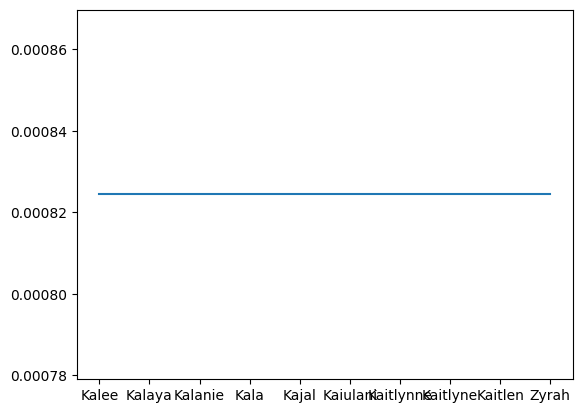

In [ ]:
# plot_name(*top10)
import matplotlib.pyplot as plt

plt.plot(top_10_dec)


For fun, try plotting your name or your friends' names.